In [1]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

import os; os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import impulse_responses as IR

Go ahead and change the bitstream below! That's where the learning comes in.

In [2]:
# First set simulation frequencies and a bitstream
samp_rate = 100
symbol_rate = 1
bits=np.array([1,1,0,0,0,1,0,1])
num_periods=6 # from -3T to 3T
beta=0 # an ideal (although in this case truncated) filter

In [3]:
# make the bits range from -1 to 1 instead of 0 to 1
bits=2*bits-1

In [4]:
# Create a stream of impulses separated by T (in time) and fsT-1 (in samples)
impulses = np.zeros(len(bits)*samp_rate//symbol_rate)
impulses[::samp_rate//symbol_rate]=bits
# Append some zeros in order to let the filter "finish"
impulses=np.append(impulses,np.zeros(5*samp_rate//symbol_rate))

In [5]:
# Create the sinc shape
RC2_pulse, Tarr = IR.RC_freq_domain(symbol_rate,samp_rate,num_periods,beta)

In [6]:
# Convolve the sinc shape with the stream of impulses
filtered=lfilter(RC2_pulse,1,impulses)

In [7]:
# Make T arrays for each waveform
impulses_Ts= np.arange(0,len(impulses)/(samp_rate//symbol_rate),samp_rate**-1)
filtered_Ts = np.arange(0,len(filtered)/(samp_rate//symbol_rate),samp_rate**-1)

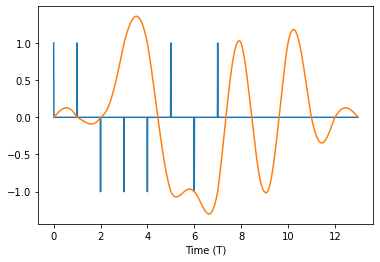

In [9]:
# Plot everything in case you're interested
plt.plot(impulses_Ts,impulses)
plt.plot(filtered_Ts,filtered)
plt.xlabel("Time (T)")
plt.show()